### Importation

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import seaborn as sns
import matplotlib.pyplot as plt

### Dataset

In [62]:
df_telco_customer = pd.read_csv('./telco_customer_dataset.csv')
display(df_telco_customer.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Removes the results column, splits the data into training and testing

In [63]:
from sklearn.preprocessing import MinMaxScaler

x = df_telco_customer.drop(['Churn', 'customerID'], axis=1)
y = df_telco_customer['Churn']

X_train, X_test, y_train, y_test = train_test_split(
x, y, test_size=0.3, random_state=42
)

### Convert categorical columns to numeric values

In [64]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_selector

encoder = ColumnTransformer(
    transformers=[
        ("categorics", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),
         make_column_selector(dtype_include="object"))
    ],
    remainder="passthrough"
)

X_train_enc = encoder.fit_transform(X_train)
X_test_enc = encoder.transform(X_test)

### Normalize data

In [65]:
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train_enc)
X_test_norm = scaler.transform(X_test_enc)

### Applying KNeighborsClassifier Model

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_norm, y_train)

y_pred = knn.predict(X_test_norm)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7553241836251775
Confusion Matrix:
 [[1316  223]
 [ 294  280]]
Classification Report:
               precision    recall  f1-score   support

          No       0.82      0.86      0.84      1539
         Yes       0.56      0.49      0.52       574

    accuracy                           0.76      2113
   macro avg       0.69      0.67      0.68      2113
weighted avg       0.75      0.76      0.75      2113



### Result Plot

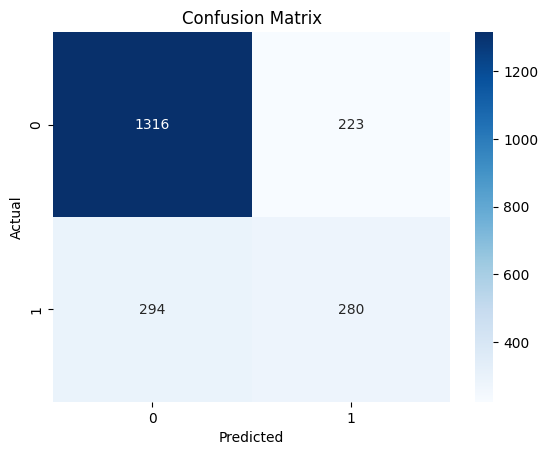

In [67]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Applying GaussianNB Model

### Applying MultinomialNB Model

### Applying DecisionTreeClassifier Model